In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid, softmax
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import cv2

Function for loading in and resizing the images

In [2]:
def load_dataset(data_path):
    images = []
    labels = []
    correct_size = (30, 30)
    for class_label in range(43):
        class_path = os.path.join(data_path, str(class_label))
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img_resized = cv2.resize(img, correct_size)
            images.append(img_resized)
            labels.append(class_label)
    return np.array(images), np.array(labels)


In [3]:
def flatten_images(images):
    flattened_images = [img.flatten() for img in images]
    return np.array(flattened_images)

Load in the dataset

In [4]:
file_path = 'gtsrb'
images, labels = load_dataset(file_path)


#Flatten/Scale
flat_images = flatten_images(images)
processed_images = flat_images/255

KeyboardInterrupt: 

Split the data

In [ ]:
#X, X_temp, y, y_temp = train_test_split(processed_images, labels, test_size=0.4, random_state=445)
#X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=445)

In [ ]:
print("Training set shape:", X.shape)
print("Cross-validation set shape:", X_cv.shape)
print("Test set shape:", X_test.shape)

Training set shape: (504, 2700)
Cross-validation set shape: (630, 2700)
Test set shape: (630, 2700)


In [ ]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(2700, )),
        Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.005), name="l1"),
        Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.005), name="l2"),
        Dense(43, activation="softmax", name="l3"),

    ], name="myModel"
)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

X_train, X_temp, y_train, y_temp = train_test_split(processed_images, labels, test_size=0.4, random_state=445)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=445)

history = model.fit(X_train, y_train, epochs=35, validation_data=(X_cv, y_cv))


Epoch 1/35
60/60 [==============================] - 3s 16ms/step - loss: 1.7150 - accuracy: 0.5550 - val_loss: 1.4418 - val_accuracy: 0.5206
Epoch 2/35
60/60 [==============================] - 1s 10ms/step - loss: 1.2317 - accuracy: 0.6349 - val_loss: 1.0580 - val_accuracy: 0.6873
Epoch 3/35
60/60 [==============================] - 0s 8ms/step - loss: 1.0410 - accuracy: 0.6619 - val_loss: 0.8798 - val_accuracy: 0.7952
Epoch 4/35
60/60 [==============================] - 0s 7ms/step - loss: 0.8610 - accuracy: 0.7746 - val_loss: 0.8528 - val_accuracy: 0.7349
Epoch 5/35
60/60 [==============================] - 0s 7ms/step - loss: 0.8045 - accuracy: 0.7640 - val_loss: 0.6986 - val_accuracy: 0.8492
Epoch 6/35
60/60 [==============================] - 0s 7ms/step - loss: 0.6717 - accuracy: 0.8418 - val_loss: 0.7376 - val_accuracy: 0.7365
Epoch 7/35
60/60 [==============================] - 0s 8ms/step - loss: 0.6573 - accuracy: 0.8275 - val_loss: 0.8629 - val_accuracy: 0.6492
Epoch 8/35
60/60 [

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

20/20 [==============================] - 0s 4ms/step - loss: 0.4995 - accuracy: 0.9048
Test Accuracy: 90.48%


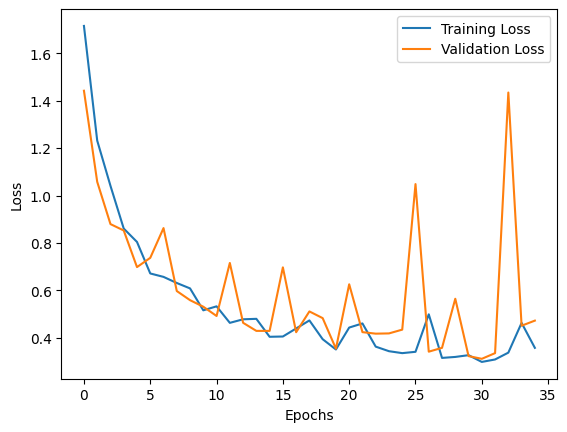

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()